In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
confirmed = pd.read_csv('covid19_confirmed.csv')
recovered = pd.read_csv('covid19_recovered.csv')
deaths = pd.read_csv('covid19_deaths.csv')

In [3]:
confirmed = confirmed.drop(['Province/State', 'Lat','Long'] , axis =1)
recovered = recovered.drop(['Province/State', 'Lat','Long'] , axis =1)
deaths= deaths.drop(['Province/State', 'Lat','Long'] , axis =1)

In [4]:
confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')


In [5]:
recovered = recovered.groupby(recovered['Country/Region']).aggregate('sum')

In [6]:
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')


In [7]:
confirmed = confirmed.T
recovered = recovered.T
deaths = deaths.T

In [8]:
#print(confirmed).head()

In [9]:
#print(recovered).head()

In [10]:
confirmed.describe()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,21034.739130,5636.652174,21941.642140,1196.852843,2064.468227,54.046823,2.694236e+05,26799.133779,12714.311037,27634.909699,...,1104.431438,20977.618729,0.020067,24874.929766,521.916388,13662.237458,6.725753,958.735786,5326.879599,2773.966555
std,17623.277979,7072.034635,21973.370848,1350.806331,3408.526205,44.995203,3.879946e+05,29005.947318,10550.057244,35438.213016,...,954.261529,24568.980488,0.140464,33505.473958,427.005513,18875.212732,4.156144,898.542067,6425.937832,3422.925087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.000000,369.000000,1371.500000,513.000000,15.000000,15.000000,1.502500e+03,827.500000,5742.000000,12174.000000,...,410.500000,399.500000,0.000000,162.000000,243.000000,245.500000,4.000000,0.000000,39.000000,9.500000
50%,27878.000000,1838.000000,11504.000000,855.000000,172.000000,26.000000,3.957000e+04,19157.000000,7411.000000,17271.000000,...,853.000000,5946.000000,0.000000,3591.000000,349.000000,675.000000,9.000000,919.000000,1430.000000,479.000000
75%,38219.500000,9667.000000,44995.500000,1191.500000,2753.000000,94.000000,4.337055e+05,43976.500000,25986.000000,27805.500000,...,1618.500000,42282.000000,0.000000,48319.500000,1045.000000,23578.000000,10.000000,1969.000000,12398.000000,6598.500000
max,43240.000000,27830.000000,67679.000000,5872.000000,13451.000000,134.000000,1.310491e+06,117337.000000,27749.000000,203956.000000,...,4030.000000,70243.000000,1.000000,97352.000000,1281.000000,63031.000000,10.000000,2072.000000,17123.000000,8829.000000


In [11]:
confirmed.shape
deaths.shape

(299, 191)

In [12]:
deaths.shape

(299, 191)

In [13]:
recovered.shape

(299, 191)

In [14]:
new_cases = confirmed.copy()

In [15]:
#calculating the growth
#1-how many new cases we have everyday
for day in range(1,len(confirmed)):               #length of the df "confirmed"= how many rows it has
    new_cases.iloc[day]=confirmed.iloc[day]-confirmed.iloc[day-1]

print(new_cases.tail(5))
#print(confirmed.tail(5))

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
11/11/20                146      507      811       90     137   
11/12/20                186      410      851       49     100   
11/13/20                174      490      867      109     175   
11/14/20                 66      532      844        0     146   
11/15/20                205      597      860      147      77   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
11/11/20                          0      10880     1861          4     7514   
11/12/20                          0      11163     2132          1     9262   
11/13/20                          2      11859     1703          6     9586   
11/14/20                          1       8468     1472         29     7063   
11/15/20                          0       5645     1482         38     5665   

Country/Region  ...  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  \
11/11/20        ...       80         370        0      

In [16]:
print(confirmed.tail(5))

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
11/11/20              42609    25801    64257     5567   12953   
11/12/20              42795    26211    65108     5616   13053   
11/13/20              42969    26701    65975     5725   13228   
11/14/20              43035    27233    66819     5725   13374   
11/15/20              43240    27830    67679     5872   13451   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
11/11/20                        131    1273356   110548      27675   172380   
11/12/20                        131    1284519   112680      27676   181642   
11/13/20                        133    1296378   114383      27682   191228   
11/14/20                        134    1304846   115855      27711   198291   
11/15/20                        134    1310491   117337      27749   203956   

Country/Region  ...  Uruguay  Uzbekistan  Vanuatu  Venezuela  Vietnam  \
11/11/20        ...     3700       69397        1      

In [17]:
#2-calculating the growth rate /day/country
growth_rate = confirmed.copy()
for day in range(1,len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day]/confirmed.iloc[day-1])*100
print(growth_rate.tail(5))

Country/Region  Afghanistan   Albania   Algeria   Andorra    Angola  \
11/11/20           0.343829  2.004428  1.278252  1.643235  1.068976   
11/12/20           0.436527  1.589086  1.324369  0.880187  0.772022   
11/13/20           0.406590  1.869444  1.331634  1.940883  1.340688   
11/14/20           0.153599  1.992435  1.279272  0.000000  1.103719   
11/15/20           0.476356  2.192193  1.287059  2.567686  0.575744   

Country/Region  Antigua and Barbuda  Argentina   Armenia  Australia   Austria  \
11/11/20                   0.000000   0.861799  1.712256   0.014456  4.557641   
11/12/20                   0.000000   0.876660  1.928574   0.003613  5.373013   
11/13/20                   1.526718   0.923225  1.511360   0.021679  5.277414   
11/14/20                   0.751880   0.653205  1.286905   0.104761  3.693497   
11/15/20                   0.000000   0.432618  1.279185   0.137130  2.856912   

Country/Region  ...   Uruguay  Uzbekistan  Vanuatu  Venezuela   Vietnam  \
11/11/20   

In [18]:
active_cases = confirmed.copy()

In [19]:

for day in range(0,len(confirmed)):    # on commence par 0 car on a pas besoin de revenir au jour d'avant ,on a juste besoin de partir d'aujourrd'hui
   active_cases.iloc[day]-deaths.iloc[day]-recovered.iloc[day] 



In [20]:
overall_growth_rate= confirmed.copy()


In [21]:
for day in range(1,len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day-1])/active_cases.iloc[day-1])*100
print(overall_growth_rate.tail(5))

Country/Region  Afghanistan   Albania   Algeria   Andorra    Angola  \
11/11/20           0.343829  2.004428  1.278252  1.643235  1.068976   
11/12/20           0.436527  1.589086  1.324369  0.880187  0.772022   
11/13/20           0.406590  1.869444  1.331634  1.940883  1.340688   
11/14/20           0.153599  1.992435  1.279272  0.000000  1.103719   
11/15/20           0.476356  2.192193  1.287059  2.567686  0.575744   

Country/Region  Antigua and Barbuda  Argentina   Armenia  Australia   Austria  \
11/11/20                   0.000000   0.861799  1.712256   0.014456  4.557641   
11/12/20                   0.000000   0.876660  1.928574   0.003613  5.373013   
11/13/20                   1.526718   0.923225  1.511360   0.021679  5.277414   
11/14/20                   0.751880   0.653205  1.286905   0.104761  3.693497   
11/15/20                   0.000000   0.432618  1.279185   0.137130  2.856912   

Country/Region  ...   Uruguay  Uzbekistan  Vanuatu  Venezuela   Vietnam  \
11/11/20   

In [22]:
print(overall_growth_rate['China'].tail(5))

11/11/20    0.035979
11/12/20    0.033787
11/13/20    0.026149
11/14/20    0.022874
11/15/20    0.023958
Name: China, dtype: float64


In [23]:
print(overall_growth_rate['Tunisia'].tail(10))

11/6/20     0.000000
11/7/20     4.837640
11/8/20     2.266224
11/9/20     0.632742
11/10/20    1.989688
11/11/20    2.094721
11/12/20    2.125547
11/13/20    2.052401
11/14/20    2.151465
11/15/20    1.342341
Name: Tunisia, dtype: float64


In [24]:
#overall_growth=calcule les nouveaux cas par rapport au nombres de personnes guéris
print(overall_growth_rate['France'].tail(10))

11/6/20     3.682681
11/7/20     0.003334
11/8/20     7.335126
11/9/20     1.150019
11/10/20    0.054787
11/11/20    3.101746
11/12/20    0.019009
11/13/20    0.020624
11/14/20    0.001879
11/15/20    0.000000
Name: France, dtype: float64


In [25]:
death_rate = confirmed.copy()

In [26]:
#pourcentage des décès
for day in range(0, len(confirmed)): #on s'interesse a ajourd'hui seuleument ,on part de 0
    death_rate.iloc[day] = (deaths.iloc[day]/confirmed.iloc[day])*100
print(death_rate['Morocco'].tail(5))
    

11/11/20    1.665028
11/12/20    1.650886
11/13/20    1.640244
11/14/20    1.629709
11/15/20    1.630073
Name: Morocco, dtype: float64


In [27]:
#estimation de pourcentage des hospitalisations ('needed')
hospitalization_rate_estimate = 0.05
hospitalization_needed = confirmed.copy()

In [28]:
#for day in(0,len(confirmed)):
    #hospitalization_needed.iloc[day] = active_cases.iloc[day]*hospitalization_rate_estimate


In [29]:
confirmed.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


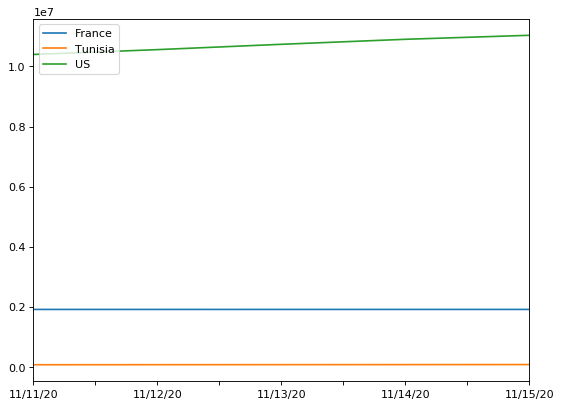

<Figure size 1440x720 with 0 Axes>

<Figure size 72x72 with 0 Axes>

In [30]:
### Data Visualization
countries = ['France','Tunisia','US']
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for country in countries:
    confirmed[country].tail().plot(label=country)
plt.legend(loc='upper left')
plt.figure(figsize=(20,10))
figure(figsize=(1,1))
plt.show()

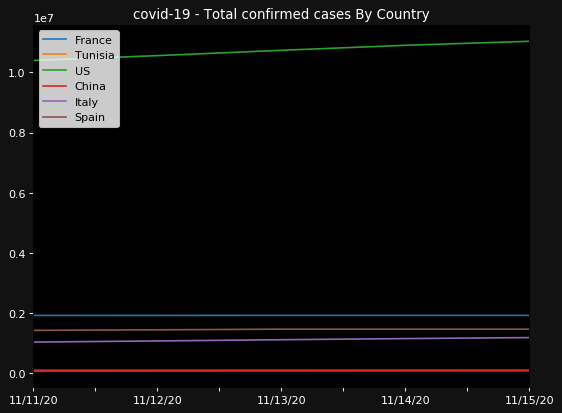

In [31]:
countries = ['France','Tunisia','US','China','Italy','Spain']
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax=plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y',colors='white')
ax.set_title('covid-19 - Total confirmed cases By Country', color ='white')

for country in countries:
    confirmed[country].tail().plot(label=country)

plt.legend(loc='upper left')
plt.show()

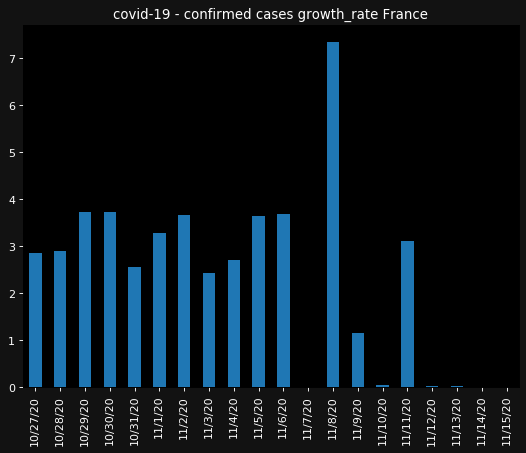

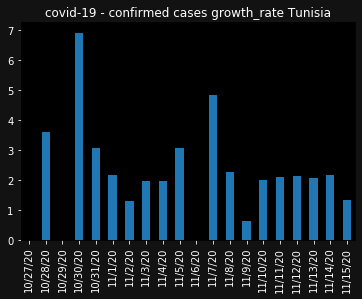

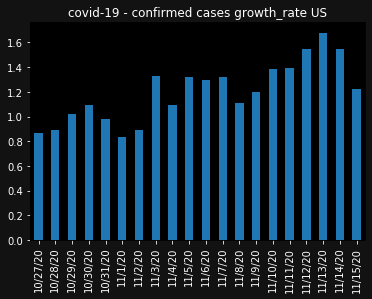

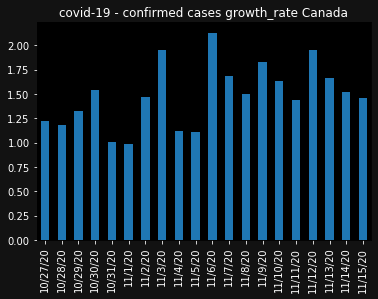

In [32]:
###growth_rate for each country #bar charts
countries = ['France','Tunisia','US','Canada']
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for country in countries:
    ax=plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y',colors='white')
    ax.set_title(f'covid-19 - confirmed cases growth_rate {country}', color ='white')
    growth_rate[country].tail(20).plot.bar()
    plt.show()
    




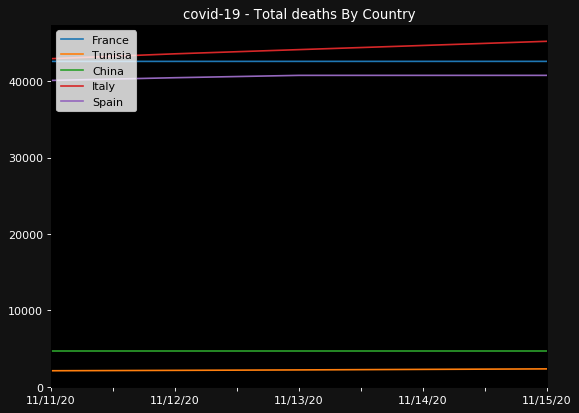

In [33]:
###deaths visualization

countries = ['France','Tunisia','China','Italy','Spain']
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax=plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y',colors='white')
ax.set_title('covid-19 - Total deaths By Country', color ='white')

for country in countries:
   deaths[country].tail().plot(label=country)

plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


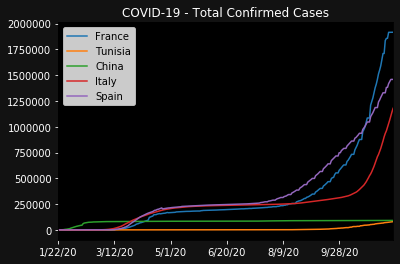

In [45]:
ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 - Total Confirmed Cases', color='white')
ax.legend(loc="upper left")

countries = ['France','Tunisia','China','Italy','Spain']

for country in countries:
    confirmed[country].plot(label = country)

plt.legend(loc='upper left')
plt.show()

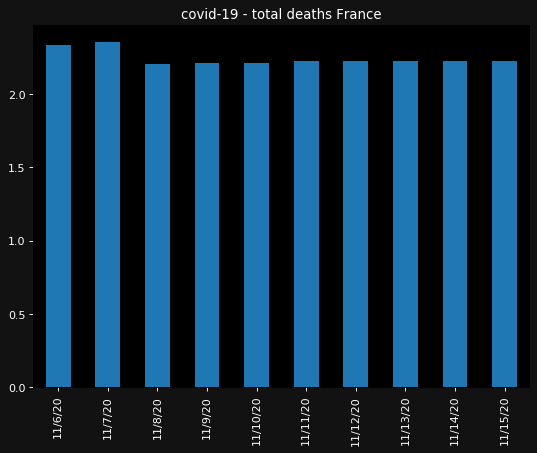

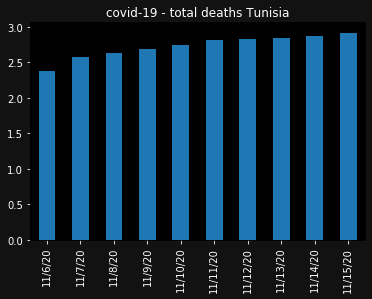

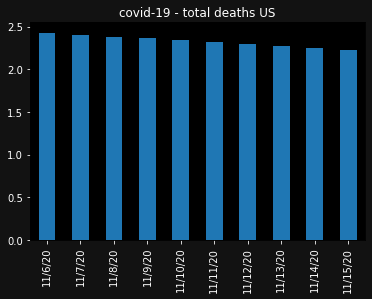

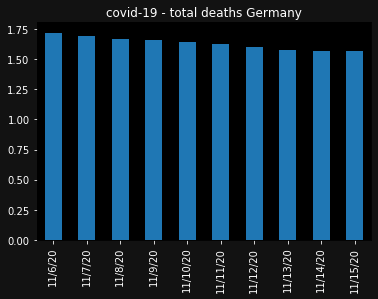

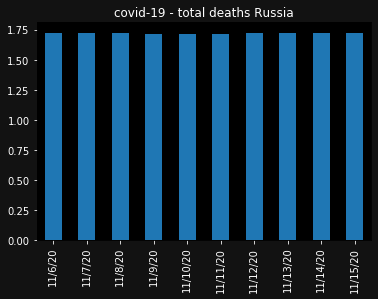

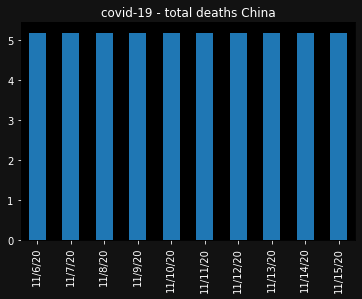

In [34]:
###deaths_growth_rate visualization by country
countries = ['France','Tunisia','US','Germany','Russia','China']
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for country in countries:
    ax=plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y',colors='white')
    ax.set_title(f'covid-19 - total deaths {country}', color ='white')
    death_rate[country].tail(10).plot.bar()
    plt.show()

C:\Users\33622\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


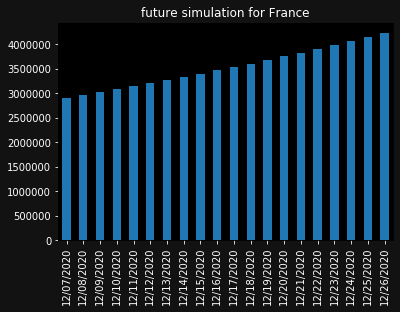

In [42]:
from datetime import datetime
### prediction based on similated numers 
simulated_growth_rate = 0.02
dates = pd.date_range(start='11/17/2020',periods=40, freq='D')
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%Y')
simulated = confirmed.copy()
simulated= simulated.append(pd.DataFrame(index=dates))

for day in range(len(confirmed), len(confirmed)+40):
    simulated.iloc[day] = simulated.iloc[day -1] * (1+simulated_growth_rate)
    
ax=plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y',colors='white')
ax.set_title('future simulation for France', color ='white')
simulated['France'].tail(20).plot.bar()
plt.show()

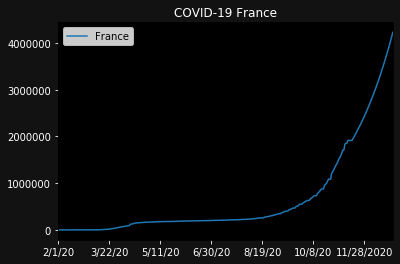

In [46]:
ax = simulated['France'][10:].plot(label="France")
ax.set_axisbelow(True)
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 France', color='white')
ax.legend(loc="upper left")

plt.show()